In [0]:
import mlflow
mlflow.pyspark.ml.autolog()

In [0]:
steam = spark.read.csv('/FileStore/tables/steam_200k.csv',
                       
                       inferSchema="true")

In [0]:
steam = steam.dropna()
steam.show()

+---------+--------------------+--------+-----+
|      _c0|                 _c1|     _c2|  _c3|
+---------+--------------------+--------+-----+
|151603712|The Elder Scrolls...|purchase|  1.0|
|151603712|The Elder Scrolls...|    play|273.0|
|151603712|           Fallout 4|purchase|  1.0|
|151603712|           Fallout 4|    play| 87.0|
|151603712|               Spore|purchase|  1.0|
|151603712|               Spore|    play| 14.9|
|151603712|   Fallout New Vegas|purchase|  1.0|
|151603712|   Fallout New Vegas|    play| 12.1|
|151603712|       Left 4 Dead 2|purchase|  1.0|
|151603712|       Left 4 Dead 2|    play|  8.9|
|151603712|            HuniePop|purchase|  1.0|
|151603712|            HuniePop|    play|  8.5|
|151603712|       Path of Exile|purchase|  1.0|
|151603712|       Path of Exile|    play|  8.1|
|151603712|         Poly Bridge|purchase|  1.0|
|151603712|         Poly Bridge|    play|  7.5|
|151603712|         Left 4 Dead|purchase|  1.0|
|151603712|         Left 4 Dead|    play

In [0]:
steam.show(truncate=False)

+---------+--------------------------+--------+-----+
|_c0      |_c1                       |_c2     |_c3  |
+---------+--------------------------+--------+-----+
|151603712|The Elder Scrolls V Skyrim|purchase|1.0  |
|151603712|The Elder Scrolls V Skyrim|play    |273.0|
|151603712|Fallout 4                 |purchase|1.0  |
|151603712|Fallout 4                 |play    |87.0 |
|151603712|Spore                     |purchase|1.0  |
|151603712|Spore                     |play    |14.9 |
|151603712|Fallout New Vegas         |purchase|1.0  |
|151603712|Fallout New Vegas         |play    |12.1 |
|151603712|Left 4 Dead 2             |purchase|1.0  |
|151603712|Left 4 Dead 2             |play    |8.9  |
|151603712|HuniePop                  |purchase|1.0  |
|151603712|HuniePop                  |play    |8.5  |
|151603712|Path of Exile             |purchase|1.0  |
|151603712|Path of Exile             |play    |8.1  |
|151603712|Poly Bridge               |purchase|1.0  |
|151603712|Poly Bridge      

In [0]:
new_column_names = ['member_Id', 'game_name', 'behavior','hourplay']

steam1 = steam.toDF(*new_column_names)
steam1.show()


+---------+--------------------+--------+--------+
|member_Id|           game_name|behavior|hourplay|
+---------+--------------------+--------+--------+
|151603712|The Elder Scrolls...|purchase|     1.0|
|151603712|The Elder Scrolls...|    play|   273.0|
|151603712|           Fallout 4|purchase|     1.0|
|151603712|           Fallout 4|    play|    87.0|
|151603712|               Spore|purchase|     1.0|
|151603712|               Spore|    play|    14.9|
|151603712|   Fallout New Vegas|purchase|     1.0|
|151603712|   Fallout New Vegas|    play|    12.1|
|151603712|       Left 4 Dead 2|purchase|     1.0|
|151603712|       Left 4 Dead 2|    play|     8.9|
|151603712|            HuniePop|purchase|     1.0|
|151603712|            HuniePop|    play|     8.5|
|151603712|       Path of Exile|purchase|     1.0|
|151603712|       Path of Exile|    play|     8.1|
|151603712|         Poly Bridge|purchase|     1.0|
|151603712|         Poly Bridge|    play|     7.5|
|151603712|         Left 4 Dead

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import monotonically_increasing_id

spark = SparkSession.builder \
    .appName("Add Game IDs") \
    .getOrCreate()
distinct_game_names_df = steam1.select("game_name").distinct()
distinct_game_names_with_id_df = distinct_game_names_df.withColumn("game_id", monotonically_increasing_id())

mysteam=steam1.join(distinct_game_names_with_id_df, steam1.game_name==distinct_game_names_with_id_df.game_name, "left").drop("game_name")
mysteam.show()

+---------+--------+--------+-------+
|member_Id|behavior|hourplay|game_id|
+---------+--------+--------+-------+
|151603712|purchase|     1.0|   2609|
|151603712|    play|   273.0|   2609|
|151603712|purchase|     1.0|    410|
|151603712|    play|    87.0|    410|
|151603712|purchase|     1.0|   3868|
|151603712|    play|    14.9|   3868|
|151603712|purchase|     1.0|   3820|
|151603712|    play|    12.1|   3820|
|151603712|purchase|     1.0|     69|
|151603712|    play|     8.9|     69|
|151603712|purchase|     1.0|   3340|
|151603712|    play|     8.5|   3340|
|151603712|purchase|     1.0|   1562|
|151603712|    play|     8.1|   1562|
|151603712|purchase|     1.0|   4116|
|151603712|    play|     7.5|   4116|
|151603712|purchase|     1.0|   1992|
|151603712|    play|     3.3|   1992|
|151603712|purchase|     1.0|   3893|
|151603712|    play|     2.8|   3893|
+---------+--------+--------+-------+
only showing top 20 rows



In [0]:
#purchase
purchase_steam = mysteam[mysteam['behavior'] == 'purchase']

purchase_steam.show()

+---------+--------+--------+-------+
|member_Id|behavior|hourplay|game_id|
+---------+--------+--------+-------+
|151603712|purchase|     1.0|   2609|
|151603712|purchase|     1.0|    410|
|151603712|purchase|     1.0|   3868|
|151603712|purchase|     1.0|   3820|
|151603712|purchase|     1.0|     69|
|151603712|purchase|     1.0|   3340|
|151603712|purchase|     1.0|   1562|
|151603712|purchase|     1.0|   4116|
|151603712|purchase|     1.0|   1992|
|151603712|purchase|     1.0|   3893|
|151603712|purchase|     1.0|   1754|
|151603712|purchase|     1.0|   3341|
|151603712|purchase|     1.0|   3540|
|151603712|purchase|     1.0|   2392|
|151603712|purchase|     1.0|    653|
|151603712|purchase|     1.0|   4023|
|151603712|purchase|     1.0|   3273|
|151603712|purchase|     1.0|   3517|
|151603712|purchase|     1.0|   2119|
|151603712|purchase|     1.0|   3541|
+---------+--------+--------+-------+
only showing top 20 rows



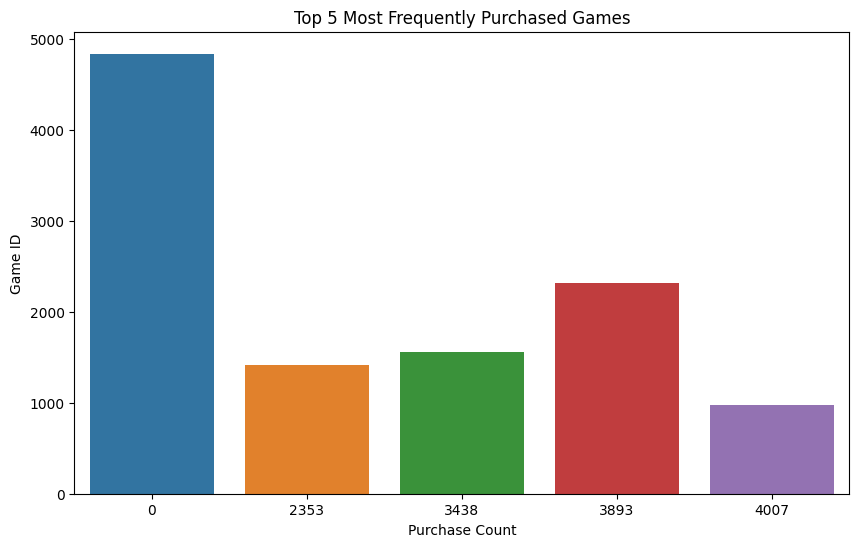

In [0]:
# Plot the top 5 most frequently purchased games
import seaborn as sns
import matplotlib.pyplot as plt
purchase_counts = purchase_steam.groupBy("game_id").count().orderBy("count", ascending=False)
top_5_purchase_counts = purchase_counts.limit(5)
top_5_purchase_counts_df = top_5_purchase_counts.toPandas()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_purchase_counts_df, x='game_id', y='count')
plt.title('Top 5 Most Frequently Purchased Games')
plt.xlabel('Purchase Count')
plt.ylabel('Game ID')
plt.show()


In [0]:
(training, test) = purchase_steam.randomSplit([0.8, 0.2], seed=100)

training = training.unionAll(purchase_steam)

In [0]:
from pyspark.ml.recommendation import ALS
als = ALS(maxIter=5, regParam=0.01, userCol="member_Id", itemCol="game_id", ratingCol="hourplay",
          seed=100)
model = als.fit(training)

2024/05/01 18:12:40 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '884fce297e8449ba8a8fb6c560537013', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2024/05/01 18:12:41 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/databricks/python/lib/python3.10/site-packages/mlflow/data/spark_dataset.py:159: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missi

In [0]:
predictions = model.transform(test).dropna()
predictions.show()

+---------+--------+--------+-------+----------+
|member_Id|behavior|hourplay|game_id|prediction|
+---------+--------+--------+-------+----------+
|     5250|purchase|     1.0|    442| 0.9749269|
|     5250|purchase|     1.0|   1996|0.94710994|
|     5250|purchase|     1.0|   3458| 1.0269991|
|     5250|purchase|     1.0|   4303| 1.0167481|
|    76767|purchase|     1.0|    487| 1.0166323|
|    76767|purchase|     1.0|   1017| 1.0061419|
|    76767|purchase|     1.0|   1635| 0.9415776|
|    76767|purchase|     1.0|   1950| 1.0245332|
|    76767|purchase|     1.0|   1971|0.92038333|
|    76767|purchase|     1.0|   1996|0.92106855|
|    76767|purchase|     1.0|   2307| 0.9552475|
|    76767|purchase|     1.0|   2332| 1.0175451|
|    76767|purchase|     1.0|   3689|  0.913897|
|   103360|purchase|     1.0|    628|0.96695787|
|   103360|purchase|     1.0|   1527| 1.0136162|
|   103360|purchase|     1.0|   3689| 0.9634152|
|   181212|purchase|     1.0|   1527| 1.0109842|
|   181212|purchase|

In [0]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(metricName="rmse", labelCol="hourplay", predictionCol="prediction")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) = " + str(rmse))

Root Mean Squared Error (RMSE) = 0.03667392774776286


In [0]:
userRecs = model.recommendForAllUsers(5) 

In [0]:
print("Sample user recommendations:")
userRecs.show(5, truncate=False)

Sample user recommendations:
+---------+----------------------------------------------------------------------------------------------+
|member_Id|recommendations                                                                               |
+---------+----------------------------------------------------------------------------------------------+
|76767    |[{4660, 1.2644736}, {612, 1.2018559}, {4103, 1.1955372}, {3577, 1.1886697}, {1051, 1.1602938}]|
|144736   |[{4660, 1.284478}, {4103, 1.2090895}, {3577, 1.1995863}, {1051, 1.1890478}, {3789, 1.1747489}]|
|229911   |[{4660, 1.2768016}, {1051, 1.1921147}, {4103, 1.1919621}, {612, 1.1886308}, {3577, 1.1833024}]|
|835015   |[{4660, 1.2750739}, {4103, 1.2064136}, {3577, 1.1972455}, {1051, 1.1811393}, {612, 1.1712136}]|
|948368   |[{4660, 1.2835784}, {612, 1.2261788}, {4103, 1.2066596}, {3577, 1.1974787}, {1051, 1.1863861}]|
+---------+----------------------------------------------------------------------------------------------+
only sho

In [0]:
member_Id=298950
userRecs.filter(userRecs.member_Id == member_Id).show()

+---------+--------------------+
|member_Id|     recommendations|
+---------+--------------------+
|   298950|[{2905, 1.2504506...|
+---------+--------------------+



In [0]:
#play
play_steam = mysteam[mysteam['behavior'] == 'play']
play_steam.show()

+---------+--------+--------+-------+
|member_Id|behavior|hourplay|game_id|
+---------+--------+--------+-------+
|151603712|    play|   273.0|   2609|
|151603712|    play|    87.0|    410|
|151603712|    play|    14.9|   3868|
|151603712|    play|    12.1|   3820|
|151603712|    play|     8.9|     69|
|151603712|    play|     8.5|   3340|
|151603712|    play|     8.1|   1562|
|151603712|    play|     7.5|   4116|
|151603712|    play|     3.3|   1992|
|151603712|    play|     2.8|   3893|
|151603712|    play|     2.5|   1754|
|151603712|    play|     2.0|   3341|
|151603712|    play|     1.4|   3540|
|151603712|    play|     1.3|   2392|
|151603712|    play|     1.3|    653|
|151603712|    play|     0.8|   4023|
|151603712|    play|     0.8|   3273|
|151603712|    play|     0.6|   3517|
|151603712|    play|     0.5|   2119|
|151603712|    play|     0.5|   3541|
+---------+--------+--------+-------+
only showing top 20 rows



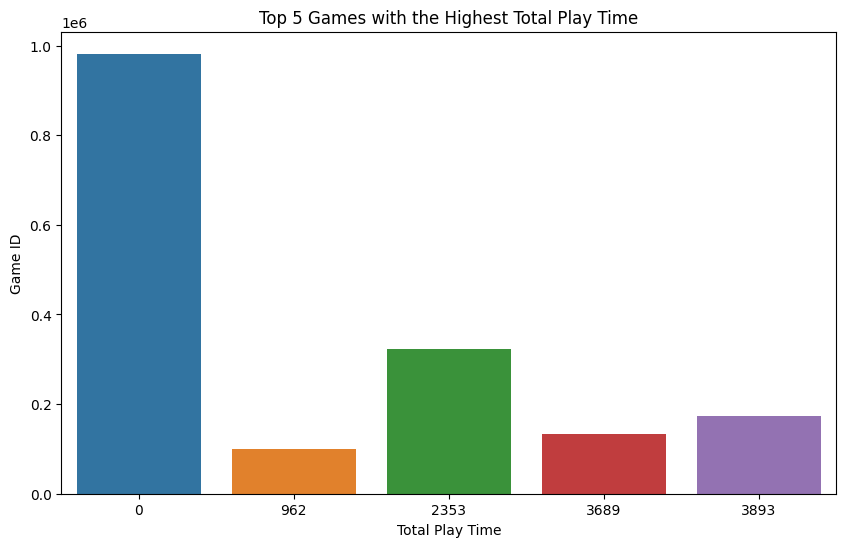

In [0]:
#Top 5 highest totsl 'play' time
from pyspark.sql.functions import sum
import matplotlib.pyplot as plt
import seaborn as sns

most_played_games = play_steam.groupBy("game_id").agg(sum("hourplay").alias("total_play_time")).orderBy("total_play_time", ascending=False)

most_played_games_pd = most_played_games.toPandas()

plt.figure(figsize=(10, 6))
sns.barplot(data=most_played_games_pd.head(5), y='total_play_time', x='game_id')
plt.title('Top 5 Games with the Highest Total Play Time')
plt.xlabel('Total Play Time')
plt.ylabel('Game ID')
plt.show()

In [0]:
(training, test) = play_steam.randomSplit([0.8, 0.2], seed=100)
training = training.unionAll(play_steam)

In [0]:
from pyspark.ml.recommendation import ALS
als = ALS(maxIter=5, regParam=0.01, userCol="member_Id", itemCol="game_id", ratingCol="hourplay",
          seed=100)
model = als.fit(training)

2024/05/01 18:14:43 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '3826295fd054412a8cce7221838dad49', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2024/05/01 18:15:07 WARNING mlflow.pyspark.ml: Model ALS_b04ac7dc86c0 will not be autologged because it is not allowlisted or or because one or more of its nested models are not allowlisted. Call mlflow.spark.log_model() to explicitly log the model, or specify a custom allowlist via the spark.mlflow.pysparkml.autolog.logModelAllowlistFile Spark conf (see mlflow.pyspark.ml.autolog docs for more info).


In [0]:
predictions = model.transform(test).dropna()
predictions.show()

+---------+--------+--------+-------+----------+
|member_Id|behavior|hourplay|game_id|prediction|
+---------+--------+--------+-------+----------+
|     5250|    play|    13.6|   1017|  13.73172|
|    76767|    play|     3.4|   3443| -8.257456|
|    76767|    play|    12.5|   2307| 12.641129|
|    76767|    play|    25.0|     44| 27.525787|
|    76767|    play|   365.0|   3689| 359.43713|
|   298950|    play|     0.1|    782|-5.7227316|
|   298950|    play|     0.2|    653| 202.40622|
|   298950|    play|     0.2|   1018|  4.876689|
|   298950|    play|     0.2|   1329|  5.652985|
|   298950|    play|     0.2|   1874|-3.5436332|
|   298950|    play|     0.2|   3078| 36.275894|
|   298950|    play|     0.2|   3869| 2.8383713|
|   298950|    play|     0.4|   1285|-4.6037965|
|   298950|    play|     0.4|   4054|-14.475901|
|   298950|    play|     0.5|      0|-208.73851|
|   298950|    play|     0.6|    245|    11.962|
|   298950|    play|     0.7|     47| 0.2530148|
|   298950|    play|

In [0]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(metricName="rmse", labelCol="hourplay", predictionCol="prediction")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) = " + str(rmse))

Root Mean Squared Error (RMSE) = 39.65066108600551


In [0]:
userRecs = model.recommendForAllUsers(5) 

In [0]:
print("Sample user recommendations:")
userRecs.show(5, truncate=False)

Sample user recommendations:
+---------+--------------------------------------------------------------------------------------------------+
|member_Id|recommendations                                                                                   |
+---------+--------------------------------------------------------------------------------------------------+
|76767    |[{2202, 9724.605}, {3176, 7716.5107}, {225, 7136.256}, {4921, 6790.492}, {2294, 4850.3525}]       |
|144736   |[{2202, 0.21399055}, {2294, 0.10761718}, {3689, 0.09999999}, {355, 0.0825119}, {3769, 0.07189901}]|
|229911   |[{1223, 4151.5674}, {3772, 3056.6252}, {351, 2246.1477}, {2689, 1979.1213}, {4124, 1906.3253}]    |
|948368   |[{2803, 383.2611}, {4921, 270.2479}, {1223, 262.6188}, {3176, 250.97}, {1506, 198.37077}]         |
|975449   |[{3697, 1282.0121}, {1553, 652.3576}, {4124, 580.4714}, {3176, 545.2612}, {3436, 416.3791}]       |
+---------+------------------------------------------------------------------------

In [0]:
#Extra Point-Hyperparameter tuning 

In [0]:
als = ALS(userCol="member_Id", itemCol="game_id", ratingCol="hourplay", seed=100)

In [0]:
from pyspark.ml.tuning import ParamGridBuilder
#Create a parameter grid

parameters = ParamGridBuilder()\
    .addGrid(als.regParam ,[0.001, 0.005, 0.01, 0.05, 0.1])\
    .addGrid(als.rank,[5,10,15])\
    .build()

In [0]:
from pyspark.ml.tuning import TrainValidationSplit
tvs = TrainValidationSplit()\
    .setSeed(100)\
    .setTrainRatio(0.75)\
    .setEstimatorParamMaps(parameters)\
    .setEstimator(als)\
    .setEvaluator(evaluator)
gridsearchModel = tvs.fit(training)

2024/05/01 18:15:45 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'abfaf49f04e84bbab230dd2b9b3182fd', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2024/05/01 18:24:42 WARNING mlflow.pyspark.ml: Model TrainValidationSplitModel_b7d77aeaa56d will not be autologged because it is not allowlisted or or because one or more of its nested models are not allowlisted. Call mlflow.spark.log_model() to explicitly log the model, or specify a custom allowlist via the spark.mlflow.pysparkml.autolog.logModelAllowlistFile Spark conf (see mlflow.pyspark.ml.autolog docs for more info).


In [0]:
bestModel = gridsearchModel.bestModel
print("Parameters for the best model:")
print("rank Parameter: %g" %bestModel.rank)
print("RegParam Parameter:%g" %bestModel._java_obj.parent().getRegParam())

Parameters for the best model:
rank Parameter: 5
RegParam Parameter:0.001
